In [1]:
import numpy as np

### 5. 배열의 생성과 변형
#### 5.1 NumPy의 자료형
NumPy의 배열 즉, ndarray클래스는 데이터가 같은 자료형이어야 한다.  
array 명령으로 배열을 만들 때 자료형을 명시적으로 적용하려면 dtype 인수를 사용한다.  
만약 dtype 인수가 없으면 주어진 데이터를 저장할 수 있는 자료형을 스스로 유추한다.  
만들어진 배열의 자료형을 알아내려면 dtype 속성을 본다.

In [2]:
x = np.array([1, 2, 3])
x.dtype

dtype('int32')

In [3]:
x = np.array([1.0, 2.0, 3.0])
x.dtype

dtype('float64')

In [5]:
x = np.array([1, 2, 3.0])
x.dtype

dtype('float64')

dtype 인수로 지정할 자료형은 다음 표에 보인것과 같은 "dtype 접두사"로 시작하는 문자열이고  
이 글자 뒤에 오는 숫자는 바이트 수 혹은 글자 수를 의미한다.  
예를 들어 f8은 8바이트(64비트) 부동소수점 실수를 뜻하고 U4 는 4글자 유니코드 문자열을 뜻한다.  
숫자를 생략하면 운영체제에 따라 알맞은 크기를 지정한다.

| dtype 접두사	| 설명 | 사용 예 |
|:-:|:-:|:-:|
| b	| 불리언 | b (참 혹은 거짓) |
| i	| 정수 | i8 (64비트) |
| u	| 부호 없는 정수 | u8 (64비트) |
| f	| 부동소수점	| f8 (64비트) |
| c	| 복소 부동소수점 | c16 (128비트) |
| O	| 객체 | 0 (객체에 대한 포인터) |
| S	| 바이트 문자열 | S24 (24 글자) |
| U	| 유니코드 문자열 | U24 (24 유니코드 글자) |

In [6]:
x = np.array([1, 2, 3], dtype='f')
x.dtype

dtype('float32')

In [7]:
x[0] + x[1]

3.0

In [8]:
x = np.array([1, 2, 3], dtype='U')
x.dtype

dtype('<U1')

In [9]:
x[0] + x[1]

'12'

#### 5.2 Inf와 NaN33
NumPy에서는 무한대를 표현하기 위한 np.inf(infinity)와 정의할 수 없는 숫자를 나타내는  
np.nan(not a number)을 사용할 수 있다.  
다음 예와 같이 1을 0으로 나누려고 하거나 0에 대한 로그 값을 계산하면 무한대인 np.inf이 나온다.  
0을 0으로 나누려고 시도하면 np.nan이 나온다.

In [10]:
np.array([0, 1, -1, 0]) / np.array([1, 0, 0, 0])

C:\Users\Q\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\Q\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([  0.,  inf, -inf,  nan])

In [11]:
np.log(0)

C:\Users\Q\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

In [12]:
np.exp(-np.inf)

0.0

#### 5.3 배열 생성
NumPy는 몇가지 간단한 배열을 생성하는 명령을 제공한다.  
- zeros, ones
- zeros_like, ones_like
- empty
- arange
- linspace, logspace
- rand, randn
  
크기가 정해져 있고 모든 값이 0인 배열을 생성하려면 zeros 명령을 사용한다.  
인수로는 배열을 크기를 뜻하는 정수를 넣는다.

In [13]:
a = np.zeros(5)
a

array([0., 0., 0., 0., 0.])

In [14]:
b = np.zeros((2, 3))
b

array([[0., 0., 0.],
       [0., 0., 0.]])

array 명령과 마찬가지로 dtype 인수를 명시하면 해당 자료형 원소를 가진 배열을 만든다.

In [15]:
c = np.zeros((5, 2), dtype="i")
c

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int32)

문자열 배열도 가능하지면 모든 원소의 문자열 크기가 같아야 한다.  
만약 더 큰 크기의 문자열을 할당하면 잘릴 수 있다.

In [16]:
d = np.zeros(5, dtype="U4")
d

array(['', '', '', '', ''], dtype='<U4')

In [17]:
d[0] = "abc"
d[1] = "abcd"
d[2] = "ABCDE"
d

array(['abc', 'abcd', 'ABCD', '', ''], dtype='<U4')

0이 아닌 1로 초기화된 배열을 생성하려면 ones 명령을 사용한다.

In [18]:
e = np.ones((2, 3, 4), dtype="i8")
e

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int64)

만약 크기를 튜플로 명시하지 않고 다른 배열과 같은 크기의 배열을 생성하고 싶다면  
ones_like, zeros_like 명령을 사용한다.

In [19]:
f = np.ones_like(b, dtype="f")
f

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

배열의 크기가 커지면 배열을 초기화하는데도 시간이 걸린다.  
이 시간을 단축하려면 배열을 생성만 하고 특정한 값으로 초기화를 하지 않는  
empty 명령을 사용할 수 있다.   
empty 명령으로 생성된 배열에는 기존에 메모리에 저장되어 있던 값이 있으므로  
배열의 원소의 값을 미리 알 수 없다.

In [20]:
g = np.empty((4, 3))
g

array([[1.02779453e-311, 3.16202013e-322, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 6.29084078e-066],
       [9.77742038e+165, 7.93137568e+165, 1.52010799e-047],
       [2.08927812e-076, 1.82877453e+184, 1.46286299e-047]])

arange 명령은 NumPy 버전의 range 명령이라고 볼 수 있다.  
특정한 규칙에 따라 증가하는 수열을 만든다.

In [22]:
np.arange(10)  # 0 .. n-1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
np.arange(3, 21, 2)  # 시작, 끝(포함하지 않음), 단계

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19])

linspace 명령이나 logspace 명령은 선형 구간 혹은 로그 구간을 지정한 구간의 수만큼 분할한다.

In [24]:
np.linspace(0, 100, 5)  # 시작, 끝(포함), 갯수

array([  0.,  25.,  50.,  75., 100.])

In [25]:
np.logspace(0.1, 1, 10)

array([ 1.25892541,  1.58489319,  1.99526231,  2.51188643,  3.16227766,
        3.98107171,  5.01187234,  6.30957344,  7.94328235, 10.        ])

#### 5.4 전치 연산
2차원 배열의 전치(transpose) 연산은 행과 열을 바꾸는 작업이다.  
이는 배열의 T 속성으로 구할 수 있다. 메서드가 아닌 속성이라는 점에 유의 한다.

In [26]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [27]:
A.T

array([[1, 4],
       [2, 5],
       [3, 6]])

#### 5.5 배열의 크기 변형
일단 만들어진 배열의 내부 데이터는 보존한 채로 형태만 바꾸려면  
reshape 명령이나 메서드를 사용한다.  
예를 들어 12개의 원소를 가진 1차원 행렬은 3x4 형태의 2차원 행렬로 만들 수 있다.

In [28]:
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [29]:
b = a.reshape(3, 4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

사용하는 원소의 갯수가 정해저 있기 때문에 reshape 명령의 형태 튜플의 원소 중 하나는  
-1이라는 숫자로 대체할 수 있다. -1을 넣으면 해당 숫자는 다를 값에서 계산되어 사용된다.

In [30]:
a.reshape(3, -1)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [31]:
a.reshape(2, 2, -1)

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [32]:
a.reshape(2, -1, 2)

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

다차원 배열을 무조건 1차원으로 펼치기 위해서는 flatten 나 ravel 메서드를 사용한다.

In [33]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [34]:
a.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

배열 사용에서 주의할 점은 길이가 5인 1차원 배열과  
행, 열의 갯수가 (5,1)인 2차원 배열 또는 행, 열의 갯수가 (1, 5)인 2차원 배열은  
데이터가 같아도 엄연히 다른 객체라는 점이다.

In [35]:
x = np.arange(5)
x

array([0, 1, 2, 3, 4])

In [36]:
x.reshape(1, 5)

array([[0, 1, 2, 3, 4]])

In [37]:
x.reshape(5, 1)

array([[0],
       [1],
       [2],
       [3],
       [4]])

이렇게 같은 배열에 대해 차원만 1차원 증가시키는 경우에는 newaxis 명령을 사용하기도 한다.

In [38]:
x[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4]])

#### 5.6 배열 연결
행의 수나 열의 수가 같은 두 개 이상의 배열을 연결하여(concatenate)  
더 큰 배열을 만들 때는 다음과 같은 명령을 사용한다.  
- hstack
- vstack
- dstack
- stack
- r_
- c_
- tile
  
hstack 명령은 행의 수가 같은 두 개 이상의 배열을 옆으로 연결하여  
열의 수가 더 많은 배열을 만든다. 연결할 배열은 하나의 리스트에 담아야 한다.

In [39]:
a1 = np.ones((2, 3))
a1

array([[1., 1., 1.],
       [1., 1., 1.]])

In [42]:
a2 = np.zeros((2, 2))
a2

array([[0., 0.],
       [0., 0.]])

In [43]:
np.hstack([a1, a2])

array([[1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0.]])

vstack 명령은 열의 수가 같은 두 개 이상의 배열을 위아래로 연결하여  
행의 수가 더 많은 배열을 만든다. 연결할 배열은 마찬가지로 하나의 리스트에 담아야 한다.

In [44]:
b1 = np.ones((2, 3))
b1

array([[1., 1., 1.],
       [1., 1., 1.]])

In [45]:
b2 = np.zeros((3, 3))
b2

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [46]:
np.vstack([b1, b2])

array([[1., 1., 1.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

dstack 명령은 제3의 축 즉, 행이나 열이 아닌 깊이(depth) 방향으로 배열을 합친다.  
가장 안쪽의 원소의 차원이 증가한다.  
즉 가장 내부의 숫자 원소가 배열이 된다.  
shape 정보로 보자면 가장 끝에 값이 2인 차원이 추가되는 것이다.  
이 예제의 경우에는 shape 변화가 2개의 (3 x 4) -> 1개의 (3 x 4 x 2)가 된다.

In [47]:
c1 = np.ones((3, 4))
c1

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [48]:
c2 = np.zeros((3, 4))
c2

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [49]:
np.dstack([c1, c2])

array([[[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]]])

In [50]:
(np.dstack([c1, c2])).shape

(3, 4, 2)

stack 명령은 dstack의 기능을 확장한 것으로 dstack처럼 마지막 차원으로 연결하는 것이 아니라  
사용자가 지정한 차원(축으로) 배열을 연결한다.  
axis 인수(디폴트 0)를 사용하여 연결후의 회전 방향을 정한다.  
디폴트 인수값은 0이고 가장 앞쪽에 차원이 생성된다.  
즉, 배열 두 개가 겹치게 되므로 연결하고자 하는 배열들의 크기가 모두 같아야 한다.  
  
다음 예에서는 axis=0 이므로 가장 값에 값이 2인 차원이 추가된다.  
즉, shape 변화는 2개의 (3 x 4) -> 1개의 (2 x 3 x 4) 이다..

In [51]:
c = np.stack([c1, c2])
c

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [52]:
c.shape

(2, 3, 4)

axis 인수가 1이면 두번째 차원으로 새로운 차원이 삽입된다.  
다음 예에서 즉, shape 변화는 2개의 (3 x 4) -> 1개의 (3 x 2 x 4) 이다

In [53]:
c = np.stack([c1, c2], axis=1)
c

array([[[1., 1., 1., 1.],
        [0., 0., 0., 0.]],

       [[1., 1., 1., 1.],
        [0., 0., 0., 0.]],

       [[1., 1., 1., 1.],
        [0., 0., 0., 0.]]])

In [54]:
c.shape

(3, 2, 4)

r_ 메서드는 hstack 명령과 비슷하게 배열을 좌우로 연결한다.  
다만 메서드임에도 불구하고 소괄호(parenthesis, ())를 사용하지 않고  
인덱싱과 같이 대괄호(bracket, [])를 사용한다. 이런 특수 메서드를 인덱서(indexer)라고 한다.

In [55]:
np.r_[np.array([1, 2, 3]), np.array([4, 5, 6])]

array([1, 2, 3, 4, 5, 6])

c_ 메서드는 배열의 차원을 증가시킨 후 좌우로 연결한다.  
만약 1차원 배열을 연결하면 2차원 배열이 된다.

In [56]:
np.c_[np.array([1, 2, 3]), np.array([4, 5, 6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

tile 명령은 동일한 배열을 반복하여 연결한다.

In [57]:
a = np.array([[0, 1, 2], [3, 4, 5]])
np.tile(a, 2)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

In [58]:
np.tile(a, (3, 2))

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

#### 5.7 2차원 그리드 포인트 생성
변수가 2개인 2차원 함수의 그래프를 그리거나 표를 작성하려면 2차원 영역에 대한  
(x,y) 좌표값 쌍 즉, 그리드 포인트(grid point)를 생성하여  
각 좌표에 대한 함수 값을 계산해야 한다.  
예를 들어 x, y 라는 두 변수를 가진 함수에서 x가 0부터 2까지,  
y가 0부터 4까지의 사각형 영역에서 변화하는 과정을 보고 싶다면  
이 사각형 영역 안의 다음과 같은 그리드 포인트들에 대해 함수를 계산해야 한다.  
  
(x,y)=(0,0),(0,1),(0,2),(0,3),(0,4),(1,0),⋯(2,4)  
   
이러한 그리드 포인트를 만드는 과정을 도와주는 것이 meshgrid 명령이다.  
meshgrid 명령은 사각형 영역을 구성하는 가로축의 점들과 세로축의 점을  
나타내는 두 벡터를 인수로 받아서 이 사각형 영역을 이루는 조합을 출력한다.  
결과는 그리드 포인트의 x 값만을 표시하는 행렬과 y 값만을 표시하는 행렬 두 개로 분리하여 출력한다.

In [59]:
x = np.arange(3)
x

array([0, 1, 2])

In [60]:
y = np.arange(5)
y

array([0, 1, 2, 3, 4])

In [61]:
X, Y = np.meshgrid(x, y)

In [62]:
X

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [63]:
Y

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [64]:
[list(zip(x, y)) for x, y in zip(X, Y)]

[[(0, 0), (1, 0), (2, 0)],
 [(0, 1), (1, 1), (2, 1)],
 [(0, 2), (1, 2), (2, 2)],
 [(0, 3), (1, 3), (2, 3)],
 [(0, 4), (1, 4), (2, 4)]]

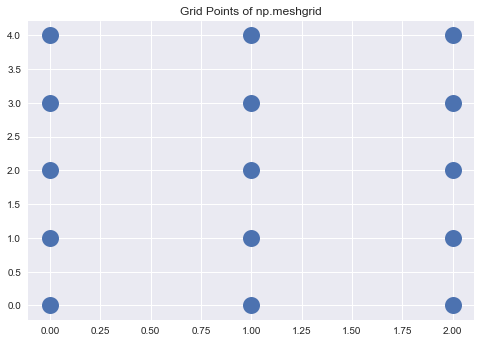

In [68]:
import matplotlib as mpl
import matplotlib.pylab as plt
plt.style.use('seaborn')
plt.title("Grid Points of np.meshgrid")
plt.scatter(X, Y, linewidths=10)
plt.show()